# Transformée de Hilbert d'un gradient

On cherche à calculer la quantité suivante : $\mathcal{H}[v']$

On peut d'abord écrire la transformée de Hilbert comme un produit de convolution :
$$ \mathcal{H}[v'] = (\frac{1}{\pi x}) * (v') $$

On applique la transformée de Fourier, sachant qu'elle transforme les produits de convolution en produit de fonctions : $$ \mathcal{F} (\mathcal{H}[v'])= \mathcal{F} (\frac{1}{\pi x} * v') = \mathcal{F} (\frac{1}{\pi x}) \cdot \mathcal{F} (v')$$

Après calcul dans le domaine fréquenciel ($k$ est la fréquence spatiale) :$$\mathcal{F} (\mathcal{H}[v']) = - i sgn(k) \cdot (i k) \mathcal{F} (v)$$

$$\mathcal{F} (\mathcal{H}[v'])= |k| \mathcal{F} (v)$$

On remonte à la quantité qui nous intéresse en utilisant la transformée de Fourier inverse :
$$\boxed{\mathcal{H}[v'] = \mathcal{F}^{-1} \big(|k| \mathcal{F} (v)\big)}$$

Le schéma d'intégration est le suivant, à une date $t$ fixée :
$$\mathcal{H}[v'](\color{blue}{x}) = \mathcal{F}^{-1}\big( \color{green}{k} \mapsto \mathcal{F}(\mathcal{H}(v'))[\color{green}{k}]\big)(\color{blue}{x}) = \mathcal{F}^{-1}\big( \color{green}{k} \mapsto |\color{green}{k}| \mathcal{F}(v)[\color{green}{k}]\big)(\color{blue}{x})$$

$$\mathcal{H}[v'](\color{blue}{x}) = \frac{1}{\sqrt{2\pi}} \color{green}{\int_{\mathbf{R}}} e^{-i \color{blue}{x} \color{green}{k}} |\color{green}{k}| \Big( \frac{1}{\sqrt{2\pi}} \color{red}{\int_{\mathbf{R}}} v[\color{red}{\omega}] e^{i \color{green}{k} \color{red}{\omega}} d\color{red}{\omega}\Big) d\color{green}{k}$$

Les intégrales seront remplacées par des sommes finies sur les échantillons :

$$\mathcal{H}[v'](\color{blue}{x}) = \frac{1}{\sqrt{2\pi}} \color{green}{\sum_{k}} e^{-i \color{blue}{x} \color{green}{k}} |\color{green}{k}| \Big( \frac{1}{\sqrt{2\pi}} \color{red}{\sum_{\omega}} v[\color{red}{\omega}] e^{i \color{green}{k} \color{red}{\omega}}\Big)$$

On calcule donc la transformée de Hilbert uniquement avec la transformée de Fourier et le tableau des vitesses sur la faille de longueur $L = I \cdot \Delta x$, d'où un calcul du terme de transformée de Hilbert en un temps de l'ordre de $\mathscr{O}(I \log I)$

Dans notre cas, on calculera présisément :$$\mathcal{H}[v'] = \mathcal{H}[(e^{\varphi})'] =\mathcal{F}^{-1} \big(|k| \mathcal{F} (e^{\varphi(k)})\big)$$

# Implémentation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sc
import scipy.stats

In [2]:
def hilbert_grad(f) :
    """
    Renvoie la transformée de Hilbert du gradient par rapport à l'espace de la fonction f
    f est un tableau de taille I x N, une colonne représente un point à tous les instants
    et une ligne représente un instant en tout point
    """
    I = len(f[0,:])
    N = len(f[:,0])
    H_grad = []
    for n in range(N) :
        f_n = f[n]
        f_n_hat = np.fft.fft(f_n)
        freq = np.fft.fftfreq(len(f_n_hat))
        H_grad_n = np.fft.ifft(np.abs(freq)*f_n_hat)
        H_grad.append(H_grad_n)
    return np.array(H_grad)

Prenons pour exemple la fonction suivante :
$$f(x) = \arctan(x)$$

Sa dérivée (soit son gradient) est connu est vaut :
$$f'(x) = \frac{1}{x^2 + 1}$$

Et la transformée de Hilbert de cette dernière fonction est aussi connue et vaut :
$$g(x) = \frac{x}{x^2 + 1}$$

Ainsi on teste notre fonction qui devrait fonctionner de la sorte :
$$f \mapsto g$$

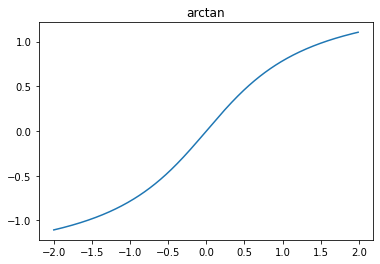

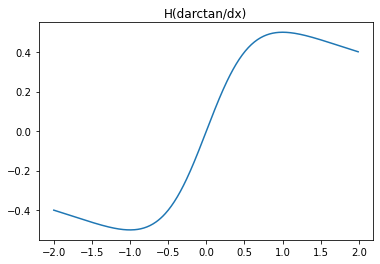

In [23]:
delta_x = 0.01
L = 4
x = np.arange(-L//2,L//2, delta_x)

f = np.arctan(x)
F = np.array([f for i in range(30)])

g = np.array([y/(1 + y**2) for y in x])
G = np.array([g for i in range(30)])

plt.plot(x,f)
plt.title('arctan')
plt.show()
plt.plot(x,g)
plt.title('H(darctan/dx)')
plt.show()

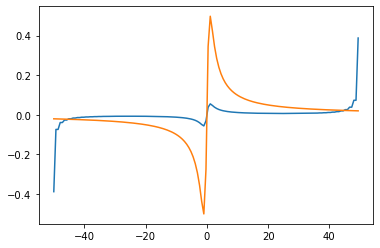

In [4]:
A = hilbert_grad(F).real #les valeurs approchées des transformée donnent une partie imaginaire
                         #très petite (e-17) mais non nulle

plt.plot(x, A[0])
plt.plot(x,g)

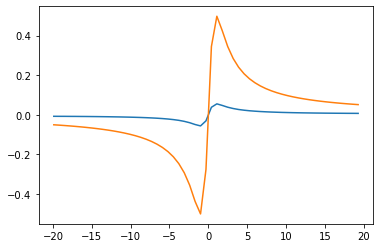

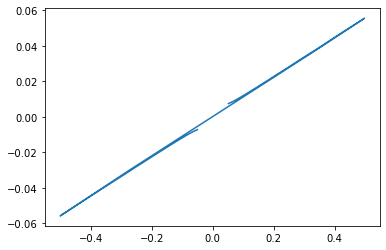

In [5]:
tol = 0.7
borne = int(tol*L/delta_x)

N = A[0][len(x) - borne:borne]
M = g[len(x) - borne:borne]
y = x[len(x) - borne:borne]

plt.plot(y,N)
plt.plot(y,M)
plt.show()

plt.plot(M, N)
plt.plot()
plt.show()

In [6]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(N, M)
print('pente = ' + str(slope))
print('corrélation = ' + str(r_value))

pente = 8.81384534568316
corrélation = 0.9992122532230292


In [7]:
Inv = slope/np.pi*delta_x
print('invariant = ' + str(Inv))

invariant = 1.9638738761781576


On a donc :
$$ hilbert\_grad(f) = \frac{2 \pi}{\Delta x} \cdot \mathcal{H}[f']$$

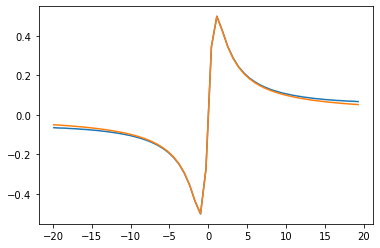

In [8]:
plt.plot(y,N*2*np.pi/delta_x)
plt.plot(y,M)
plt.show()

# Avec une fonction elliptique

On considère à un instant $t$ un champ des vitesses est de la forme :
$$ v(x) = \sqrt{1-x^2}, \forall x \in [-1, 1]$$
$$ v(x) = 0, \forall x \notin [-1, 1]$$

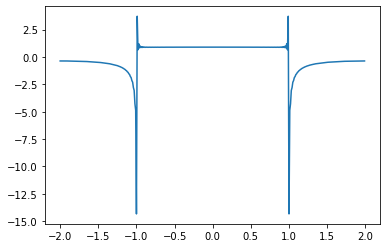

In [28]:
NU = []
for y in x :
    if y < 1 and y > -1:
        NU.append(np.sqrt(1 - y**2))
    else :
        NU.append(0)
        
V = np.array([NU for i in range(30)])

C = hilbert_grad(V).real

plt.plot(x, C[0]*2*np.pi/delta_x)
plt.show()